# Fraudulent Firm Classification: A Case Study of an External Audit

#### Data Set Information:
This dataset is taken from a research explained here.

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe.

_** The main objective of this project is to perform the audit risk analysis using 776 target firm's historical data. Our main foucs is on determining the Class of Risk. We used several supervised techniques (Classification) to determine the Risk Class which will be discussed below.** _

_** We followed a sequence of steps starting with with importing required libraries, data merging, data pre-processing, data vizualization, etc. So let's get started **_

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Datasets

In [3]:
audit = pd.read_csv('audit_risk.csv')
trial = pd.read_csv('trial.csv')

### Data Distribution

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Risk,,,,,,,,,,,,,,,,,,,,,
0,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


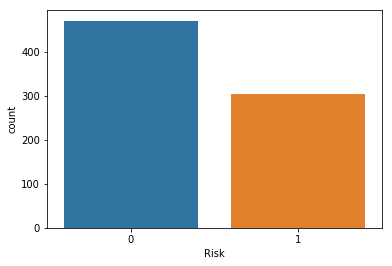

In [4]:
sns.countplot(audit['Risk'])
audit.groupby('Risk').count()

### Audit vs Risk

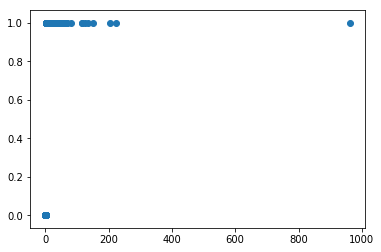

In [5]:
plt.scatter(audit['Audit_Risk'],audit['Risk'])

## We can see an outlier that screws can screw out analysis. We will handle this outlier in data pre-processing.

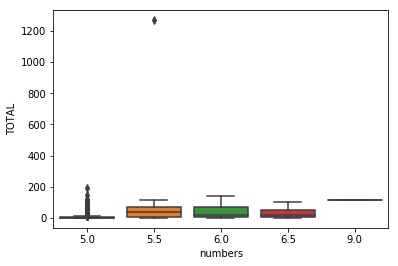

In [6]:
sns.boxplot(audit['numbers'],audit['TOTAL'])

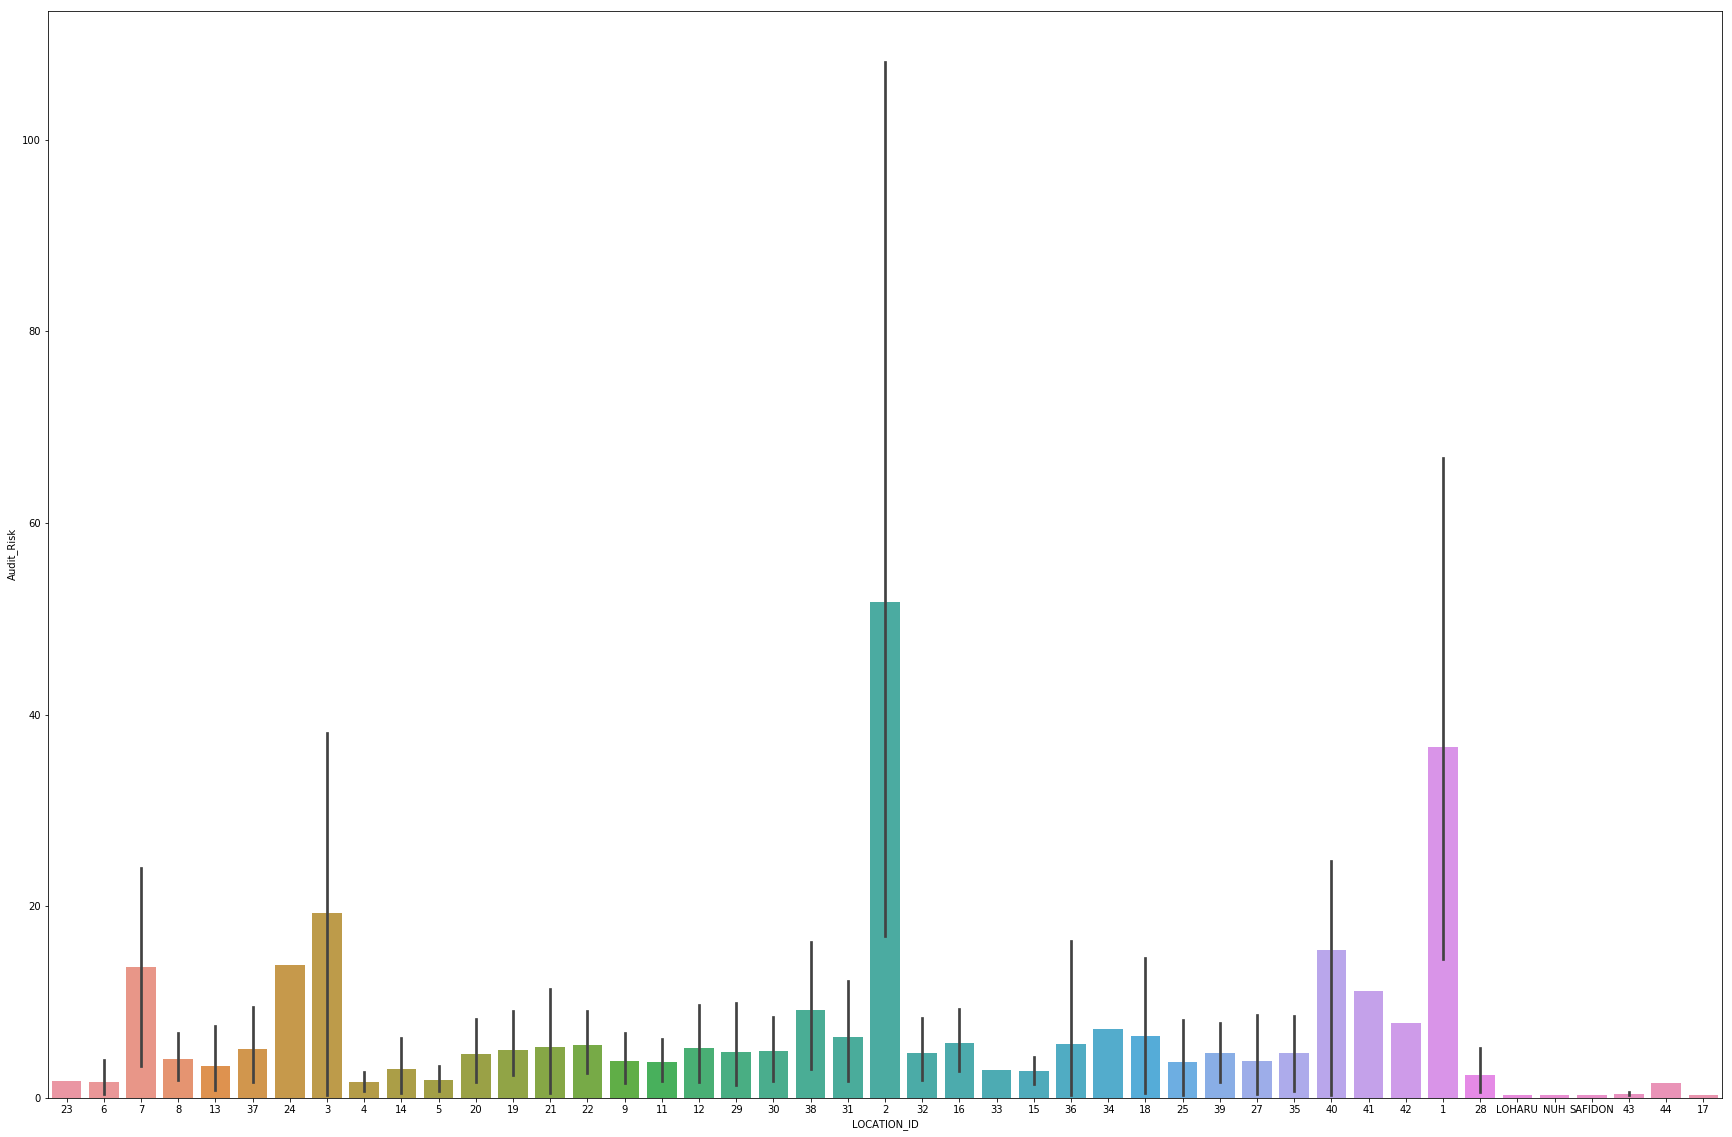

In [7]:
plt.figure(figsize=(30,20))
sns.barplot(x='LOCATION_ID',y='Audit_Risk',data= audit,estimator=np.mean)

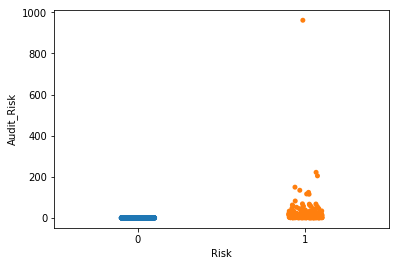

In [8]:
#loooking for outliers in the audit's risk colum
sns.stripplot(x='Risk',y='Audit_Risk',data=audit)

### Data Pre-processing
1. Imputing Missing values
2. Merging Data
3. Checking for outliers

_**1.) Imputing missing values **_ 

In [9]:
audit[audit['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,...,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [10]:
trial[trial['Money_Value'].isnull()]

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,2,0.0,2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


Both audit & trail have one missing value. Since dataset is small its better to impute the missing value rather than removing missing values. So let's impute the missing Money_Value with it's median grouped by 'Sector_Score' column

In [11]:
audit[['Sector_score','Money_Value']].groupby('Sector_score').median()

,Money_Value
Sector_score,
1.85,0.020
1.99,0.050
2.34,0.000
2.36,88.400
2.37,0.575
2.72,8.325
3.41,10.215
3.89,2.565
15.56,160.410


Sector_Score - Is the score of each firm mentioned above in Data Description

Missing value is in 'Money_Value' that falls under Sector_Score = 55.57.

Impute the missing value with median of Money_Value under Sector_score = 55.57


In [12]:
audit['Money_Value'].fillna(0,inplace=True)
trial['Money_Value'].fillna(0,inplace=True)

_** 2. Merging Datasets **_

Both dataframes (audit, trial) have similar columns that hold similar value

First sort by common columns and concatenate later

So selecting only unique column from trial data frame and concatenating to audit for analysis

In [14]:
# Sorting the data frames
audit = audit.sort_values(by=['LOCATION_ID','TOTAL'])
trial = trial.sort_values(by=['LOCATION_ID','TOTAL'])

#Concatinate data frames
data = pd.concat([audit,trial[['Loss','History_score','LOSS_SCORE','MONEY_Marks']]],axis=1)

In [15]:
data['LOCATION_ID'].unique()

array(['1', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '27', '28', '29', '3', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '5', '6', '7', '8', '9', 'LOHARU', 'NUH',
       'SAFIDON'], dtype=object)

LOCATION_ID has 3 observations with text in place of numbers Since LOCATION_ID is a field with discrete so imputing the 3 text values with MODE of the LOCATION_ID distribution = 8

In [16]:
data['LOCATION_ID'].value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
27          8
28          8
43          7
25          6
20          5
36          4
38          4
30          4
7           4
3           3
40          3
35          2
33          1
SAFIDON     1
41          1
44          1
NUH         1
42          1
LOHARU      1
24          1
23          1
34          1
17          1
Name: LOCATION_ID, dtype: int64

In [19]:
data['LOCATION_ID'].replace(['LOHARU', 'NUH','SAFIDON'],[8,8,8],inplace=True)

#### 3. Handling Outliers
In data distribution section we can across an outlier with large Audit_Risk, TOTAL value. We can handle this enither by imputing with a mean value or removing the outlier value.

Let's remove the outlier observation from data

In [20]:
data['TOTAL'].max()
# 1268.91

1268.91

In [21]:
data[data['TOTAL'] == 1268.91]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Loss,History_score,LOSS_SCORE,MONEY_Marks
241,2.72,2,4.28,0.6,2.568,1264.63,0.6,758.778,1268.91,5.5,...,5.2,801.262,2.4,0.5,961.5144,1,0,6,2,6


In [22]:
# index = 241
data.drop(241,inplace=True)

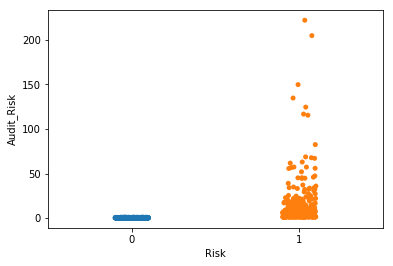

In [23]:
#loooking for outliers in the risk colum after removing outlier
sns.stripplot(x='Risk',y='Audit_Risk',data=data)

### Feature Selection

In [24]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Loss', 'History_score',
       'LOSS_SCORE', 'MONEY_Marks'],
      dtype='object')

([<matplotlib.axis.YTick at 0x245731a50b8>,
 <a list of 30 Text yticklabel objects>)

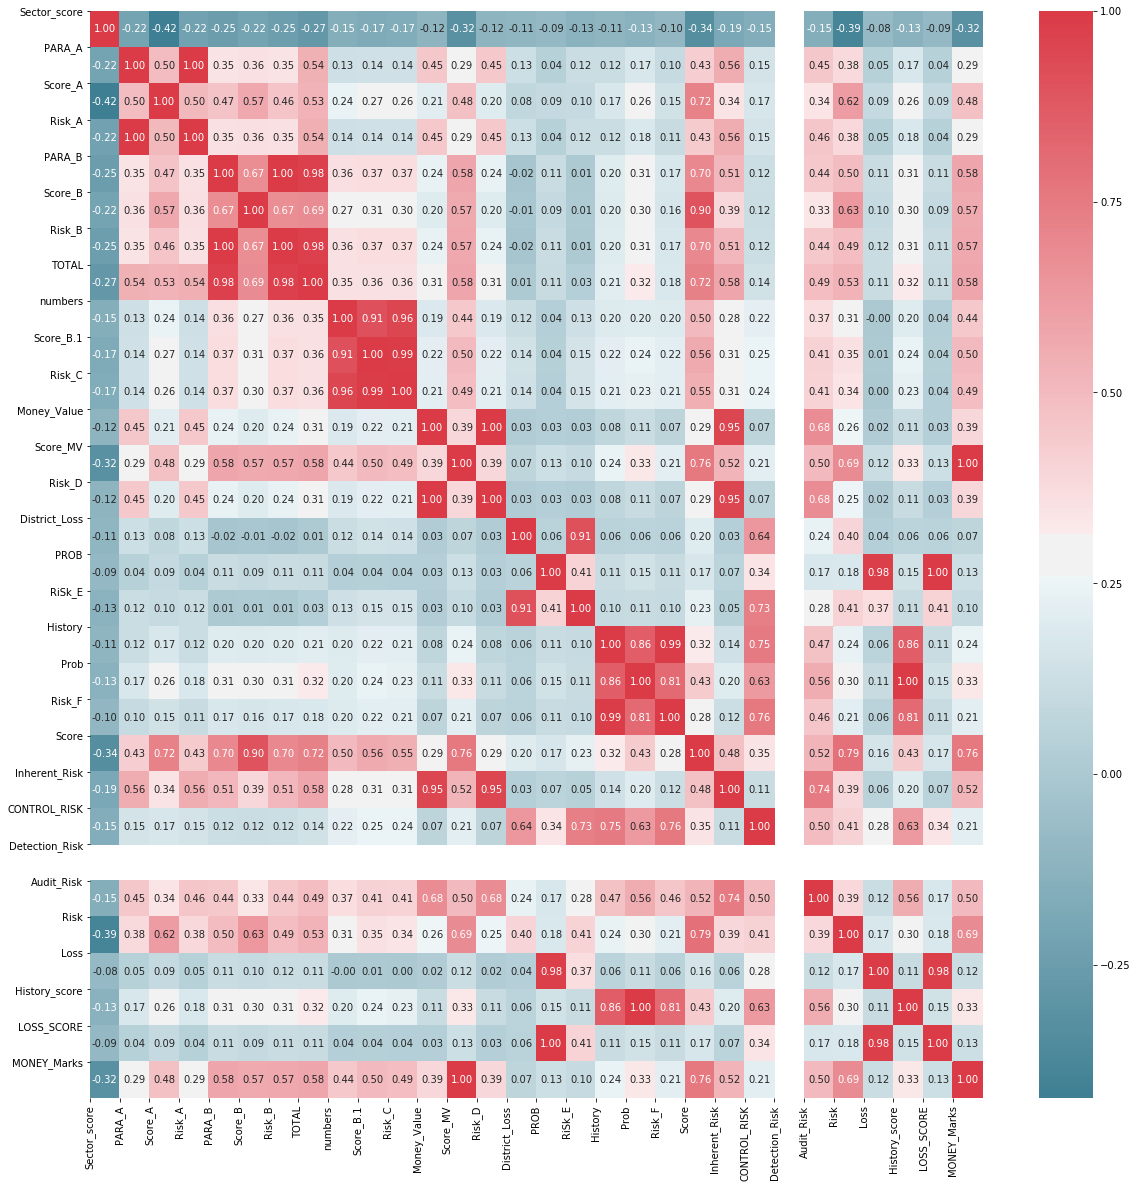

In [25]:
fig, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

In [27]:
#Highly correlated variables deflects model's accuracy. So it's better to remove variables that are highly correlated. Choosing correlation = 0.7 as threshold and removing variables that have correlation greater than 0.7

#Below are the columns that that are considered for analysis which are less correlated

#Removing Audit_Risk column, because Audit_Risk column is source for Risk Class. Risk is dependent om Audit Risk score.

In [28]:
data = data[['Sector_score', 'LOCATION_ID','PARA_A', 'Score_A','PARA_B', 'Score_B','numbers','Money_Value','Score_MV','District_Loss','LOSS_SCORE','History_score','Risk']]

In [29]:
data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'numbers', 'Money_Value', 'Score_MV', 'District_Loss', 'LOSS_SCORE',
       'History_score', 'Risk'],
      dtype='object')

### Data Scaling
Since the variables we considered for analysis are not in same range we need to scale them before analysis.

In [30]:
from sklearn.model_selection import train_test_split
X = data.drop('Risk',axis=1)
y = data['Risk']

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train_org)
X_test = scale.transform(X_test_org)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Classification
1. KNN Classification
2. Logistic Regression
3. Linear SVM
4. Kernalized SVM (kernal = [linear,rbf,poly])
5. Decision Tree

#### 1.KNN Classification

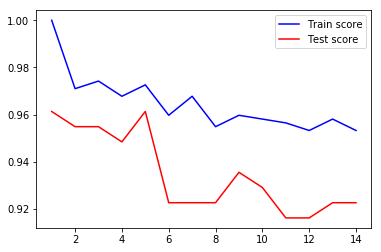

In [26]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []

n = range(1,15)
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))

plt.plot(n,train_score,'b',label='Train score')
plt.plot(n,test_score,'r',label = 'Test score')
plt.legend()

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print('Train score: {:.4f}'.format(knn.score(X_train,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test,y_test)))

Train score: 0.9742
Test score: 0.9548


In [28]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Score: {:.4f}'.format(grid.best_score_))
print('Best Paramater: {:}'.format(grid.best_params_))

Best Score: 0.9661
Best Paramater: {'n_neighbors': 3}


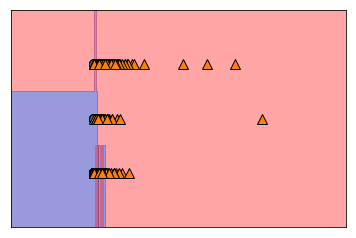

In [29]:
import mglearn
x_b = X_train[0:774,[2,5]]
y_b = y_train[0:774]

knn = KNeighborsClassifier(3)
knn.fit(x_b, y_b)

mglearn.plots.plot_2d_separator(knn, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

In [30]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
bag_knn_clf = BaggingClassifier(knn_clf,n_estimators=500,max_samples=100,random_state=0)
bag_knn_clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_knn_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_knn_clf.score(X_test, y_test)))

Train score: 0.9484
Test score: 0.9161


In [31]:
#PAsting
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
bag_knn_clf = BaggingClassifier(knn_clf,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_knn_clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_knn_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_knn_clf.score(X_test, y_test)))

Train score: 0.9468
Test score: 0.9161


##### For any estimator to support AdaBoosting, it's fit method needs to support sample_weight, which can be obtained by running following code:
##### If the classifier doesn't implement predict_proba, you will have to set AdaBoostClassifier parameter algorithm = 'SAMME'

In [32]:
# Let's check which models support Ada boosting
import inspect
from sklearn.utils.testing import all_estimators
for name, clf in all_estimators(type_filter='classifier'):
    if 'sample_weight' in inspect.getargspec(clf().fit)[0]:
       print(name)

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
ComplementNB
DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
GradientBoostingClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
MultinomialNB
NuSVC
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


C:\Users\Tanmay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  """


### Logistic Regression

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

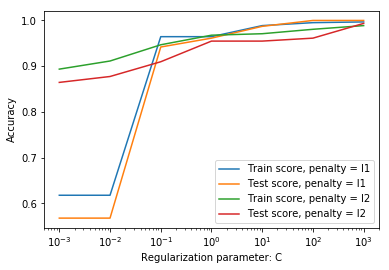

In [33]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [34]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
penalty = ['l1', 'l2']
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C=c_range, penalty=penalty)
clf = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 100


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l1',C=100)
logistic.fit(X_train,y_train)
print('Train score: {:.4f}'.format(logistic.score(X_train,y_train)))
print('Test score: {:.4f}'.format(logistic.score(X_test,y_test)))

Train score: 0.9952
Test score: 1.0000


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


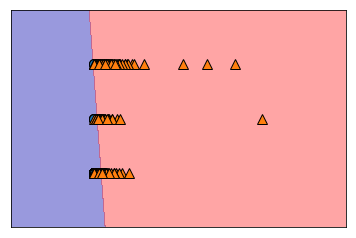

In [36]:
import mglearn
x_b = X_train[0:774,[2,5]]
y_b = y_train[0:774]

lreg = LogisticRegression(penalty='l1',C=100)
lreg.fit(x_b, y_b) 

mglearn.plots.plot_2d_separator(lreg, x_b, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_b[:, 0], x_b[:, 1], y_b)

In [37]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty='l1',C=100)
bag_logit = BaggingClassifier(logit,n_estimators=500,max_samples=100,random_state=0)
bag_logit.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_logit.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_logit.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Train score: 0.9823
Test score: 0.9613


In [38]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty='l1',C=100)
bag_logit = BaggingClassifier(logit,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_logit.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_logit.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_logit.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Train score: 0.9806
Test score: 0.9613


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [39]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(penalty='l1',C=100)
ada_logit = AdaBoostClassifier(logit,n_estimators=200,learning_rate=0.5)
ada_logit.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_logit.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_logit.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence 

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of itera

Train score: 0.9645
Test score: 0.9613


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### SVM (kernal = 'linear')

In [42]:
#Grid Search
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
param = {'C':[0.01,0.1,1,10]}
grid_search = GridSearchCV(svc_linear,param)
grid_search.fit(X_train,y_train)
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

Best Parameters:  {'C': 10}
Best Score:  0.967741935483871


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10)
svc_linear.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svc_linear.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc_linear.score(X_test, y_test)))

Train score: 0.9758
Test score: 0.9548


In [44]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10)
bag_svc_linear = BaggingClassifier(svc_linear,n_estimators=500,max_samples=100,random_state=0)
bag_svc_linear.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_linear.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_linear.score(X_test, y_test)))

Train score: 0.9694
Test score: 0.9548


In [45]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10)
bag_svc_linear = BaggingClassifier(svc_linear,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svc_linear.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_linear.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_linear.score(X_test, y_test)))

Train score: 0.9677
Test score: 0.9548


In [46]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10)
ada_svc_linear = AdaBoostClassifier(svc_linear,n_estimators=500,learning_rate=0.5,algorithm='SAMME')
ada_svc_linear.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svc_linear.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_svc_linear.score(X_test, y_test)))

Train score: 0.9645
Test score: 0.9484


### SVM : kernal = 'rbf'

In [48]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
param = {'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search = GridSearchCV(svc,param)
grid_search.fit(X_train,y_train)
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters:  {'C': 10, 'gamma': 0.1}
Best Score:  0.9661290322580646


In [49]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=10,gamma=0.1)
svc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_test, y_test)))

Train score: 0.9758
Test score: 0.9613


In [50]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=10,gamma=0.1)
bag_svc_rbf = BaggingClassifier(svc,n_estimators=500,max_samples=100,random_state=0)
bag_svc_rbf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_rbf.score(X_test, y_test)))

Train score: 0.9677
Test score: 0.9419


In [51]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=10,gamma=0.1)
bag_svc_rbf = BaggingClassifier(svc,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svc_rbf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_rbf.score(X_test, y_test)))

Train score: 0.9694
Test score: 0.9548


In [52]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=10,gamma=0.1)
ada_svc_rbf = AdaBoostClassifier(svc,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_svc_rbf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svc_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_svc_rbf.score(X_test, y_test)))

Train score: 0.8242
Test score: 0.8452


### SVM : (kernal = 'poly')

In [54]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import SVC
svc = SVC(kernel='poly')
param = {'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search = GridSearchCV(svc,param)
grid_search.fit(X_train,y_train)
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters:  {'C': 0.1, 'gamma': 10}
Best Score:  0.9612903225806452


In [55]:
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10)
svc_poly.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svc_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc_poly.score(X_test, y_test)))

Train score: 0.9984
Test score: 0.9871


In [56]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10)
bag_svc_poly = BaggingClassifier(svc_poly,n_estimators=500,max_samples=100,random_state=0)
bag_svc_poly.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_poly.score(X_test, y_test)))

Train score: 0.9742
Test score: 0.9548


In [57]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10)
bag_svc_poly = BaggingClassifier(svc_poly,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_svc_poly.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_svc_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_svc_poly.score(X_test, y_test)))

Train score: 0.9742
Test score: 0.9484


In [58]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10)
ada_svc_poly = AdaBoostClassifier(svc_poly,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_svc_poly.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_svc_poly.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_svc_poly.score(X_test, y_test)))

Train score: 0.9984
Test score: 0.9935


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
param = {'max_depth':[1,3,5]}
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree,param)
grid_search.fit(X_train,y_train)
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

Best Parameters:  {'max_depth': 5}
Best Score:  0.967741935483871


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [61]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,y_train)
print('Train score: {:.4f}'.format(tree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(tree.score(X_test, y_test)))

Train score: 0.9871
Test score: 0.9935


In [62]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train,y_train)
bag_tree = BaggingClassifier(tree,n_estimators=500,max_samples=100,random_state=0)
bag_tree.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_tree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_tree.score(X_test, y_test)))

Train score: 0.9823
Test score: 0.9871


In [63]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
bag_tree = BaggingClassifier(tree,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_tree.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_tree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_tree.score(X_test, y_test)))

Train score: 0.9790
Test score: 0.9871


In [64]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
ada_tree = AdaBoostClassifier(tree,n_estimators=200,learning_rate=0.5,algorithm='SAMME')
ada_tree.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_tree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_tree.score(X_test, y_test)))

Train score: 1.0000
Test score: 1.0000


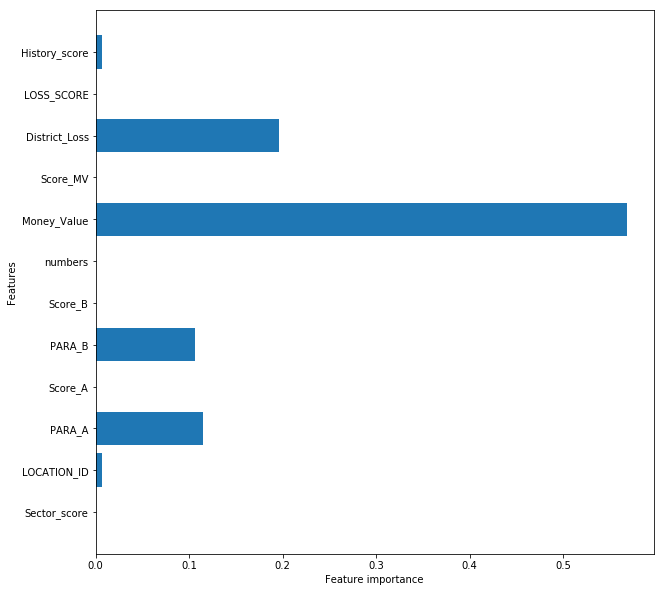

In [65]:
tree.fit(X_train, y_train)
def plot_feature_importances_risk(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(X.columns))
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
plt.figure(figsize=(10,10))
plot_feature_importances_risk(tree)

### Linear SVM

In [66]:
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
param = {'C':[0.01,0.1,1,10]}
grid_search = GridSearchCV(linear_svm,param)
grid_search.fit(X_train,y_train)
print('Best Parameters: ',grid_search.best_params_)
print('Best Score: ',grid_search.best_score_)

Best Parameters:  {'C': 10}
Best Score:  0.9693548387096774


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [67]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=10)
linear_svm.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linear_svm.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linear_svm.score(X_test,y_test)))

Train score: 0.9823
Test score: 0.9613


In [68]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=10)
bag_linear_svm = BaggingClassifier(linear_svm,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_linear_svm.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_linear_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_linear_svm.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Train score: 0.9823
Test score: 0.9613


In [69]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=10)
ada_linear_svm = AdaBoostClassifier(linear_svm,n_estimators=500,learning_rate=0.5,algorithm='SAMME')
ada_linear_svm.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_linear_svm.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_linear_svm.score(X_test, y_test)))

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Train score: 0.9823
Test score: 0.9613


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(rnd_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(rnd_clf.score(X_test, y_test)))

Train score: 0.9887
Test score: 0.9871


In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train,y_train)
bag_rnd_clf = BaggingClassifier(rnd_clf,n_estimators=500,max_samples=100,random_state=0)
bag_rnd_clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_rnd_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rnd_clf.score(X_test, y_test)))

In [ ]:
#Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train,y_train)
bag_rnd_clf = BaggingClassifier(rnd_clf,n_estimators=500,max_samples=100,random_state=0,bootstrap=False)
bag_rnd_clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(bag_rnd_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rnd_clf.score(X_test, y_test)))

In [ ]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
ada_rnd_clf = AdaBoostClassifier(rnd_clf,n_estimators=500,learning_rate=0.5,algorithm='SAMME')
ada_rnd_clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ada_rnd_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_rnd_clf.score(X_test, y_test)))

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=0,max_depth=2,learning_rate=0.01)
gbc_clf.fit(X_train,y_train)
print('Train score: {:.4f}'.format(gbc_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gbc_clf.score(X_test, y_test)))

In [ ]:
y_list = gbc_clf.feature_importances_
y_pos = np.arange(len(y_list))
features = X.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## Voting

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty='l1',C=100)
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear',C=10,probability=True)
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=10,gamma=0.1,probability=True)
from sklearn.svm import SVC
svc_poly = SVC(kernel='poly',C=1,gamma=10,probability=True)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=10)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=0,max_depth=2,learning_rate=0.01)

### Hard Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('knn',knn),('logistic',logistic),('tree',tree),('rnd_clf',rnd_clf),('gbc_clf',gbc_clf)]
voting1 = VotingClassifier(estimator1,voting='hard')
voting1.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (knn,logit,tree,rnd_clf,gbc_clf,voting1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('linear_svm',linear_svm),('svc',svc),('svc_linear',svc_linear),('svc_poly',svc_poly)]
voting2 = VotingClassifier(estimator1,voting='hard')
voting2.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (linear_svm,svc,svc_linear,svc_poly,voting2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

### Soft Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('knn',knn),('logistic',logistic),('tree',tree),('rnd_clf',rnd_clf),('gbc_clf',gbc_clf)]
voting1 = VotingClassifier(estimator1,voting='soft')
voting1.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (knn,logit,tree,rnd_clf,gbc_clf,voting1):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import VotingClassifier
estimator1 = [('svc',svc),('svc_linear',svc_linear),('svc_poly',svc_poly)]
voting2 = VotingClassifier(estimator1,voting='soft')
voting2.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
for clf in (linear_svm,svc,svc_linear,svc_poly,voting2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
Classification = {'Model':['Logistic Regression','KNN Classifier','SVM_linear','SVM_rbf','SVM_poly','Linear SVM',
                           'Decision Tree','Random Forest','Gradient Boosting Classifier'],
                 'Train Score':[0.9952,0.9742,0.9758,0.9758,0.9984,0.9823,0.9871,0.9887,0.9468],
                  'Test Score':[1,0.9548,0.9548,0.9613,0.9871,0.9613,0.9806,0.9871,0.929]
                 }
Classification_score = pd.DataFrame(Classification)
Classification_score

## PCA

In [1]:
from sklearn.decomposition import PCA
pca1 =PCA(n_components=0.95) 
XX1 = pca1.fit_transform(X_train)
print("Explained variance:",pca1.explained_variance_)
print("Number of components:",pca1.n_components_)

NameError: name 'X_train' is not defined

In [ ]:
pca = PCA(n_components=7)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_pca = LogisticRegression(penalty='l1',C=100)
logistic_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(logistic_pca.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(logistic_pca.score(X_test_reduced,y_test)))

In [ ]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(knn_pca.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(knn_pca.score(X_test_reduced,y_test)))

In [ ]:
#SVM_linear
from sklearn.svm import SVC
svc_linear_pca = SVC(kernel='linear',C=10)
svc_linear_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(svc_linear_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(svc_linear_pca.score(X_test_reduced, y_test)))

In [ ]:
#SVM_rbf
from sklearn.svm import SVC
svc_rbf_pca = SVC(kernel='rbf',C=10,gamma=0.1)
svc_rbf_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(svc_rbf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(svc_rbf_pca.score(X_test_reduced, y_test)))

In [ ]:
#SVM_poly
from sklearn.svm import SVC
svc_poly_pca = SVC(kernel='poly',C=1,gamma=10)
svc_poly_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(svc_poly_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(svc_poly_pca.score(X_test_reduced, y_test)))

In [ ]:
#LinearSVM
from sklearn.svm import LinearSVC
linear_svm_pca = LinearSVC(C=10)
linear_svm_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(linear_svm_pca.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(linear_svm_pca.score(X_test_reduced,y_test)))

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_pca = DecisionTreeClassifier(max_depth=5)
tree_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(tree_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(tree_pca.score(X_test_reduced, y_test)))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf_pca = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf_pca.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(rnd_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(rnd_clf_pca.score(X_test_reduced, y_test)))

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf_pca = GradientBoostingClassifier(random_state=0,max_depth=2,learning_rate=0.01)
gbc_clf_pca.fit(X_train_reduced,y_train)
print('Train score: {:.4f}'.format(gbc_clf_pca.score(X_train_reduced, y_train)))
print('Test score: {:.4f}'.format(gbc_clf_pca.score(X_test_reduced, y_test)))

In [ ]:
PCA_Classification = {'Model':['Logistic Regression','KNN Classifier','SVM_linear','SVM_rbf','SVM_poly','Linear SVM',
                           'Decision Tree','Random Forest','Gradient Boosting Classifier'],
                 'Train Score':[0.9694,0.9694,0.9677,0.9726,0.9839,0.9661,0.979,0.9839,0.9629],
                  'Test Score':[0.8516,0.9161,0.8452,0.8645,0.8387,0.8516,0.8516,0.8774,0.8774]
                 }
PCA_Classification_score = pd.DataFrame(PCA_Classification)
PCA_Classification_score

## DEEP LEARNING

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(32,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#hidden layers
model1.add(Dense(16,input_dim = 12 ,kernel_initializer='normal',activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model - fit
model1.fit(X_train, y_train, epochs = 50, batch_size = 300)
\
#step 4: evaluation

Epoch 1/50
620/620 [==============================] - 0s 347us/sample - loss: 0.6937 - acc: 0.4629
Epoch 2/50
620/620 [==============================] - 0s 8us/sample - loss: 0.6906 - acc: 0.6000
Epoch 3/50
620/620 [==============================] - 0s 13us/sample - loss: 0.6876 - acc: 0.8710
Epoch 4/50
620/620 [==============================] - 0s 11us/sample - loss: 0.6842 - acc: 0.9194
Epoch 5/50
620/620 [==============================] - 0s 14us/sample - loss: 0.6804 - acc: 0.9290
Epoch 6/50
620/620 [==============================] - 0s 13us/sample - loss: 0.6761 - acc: 0.9306
Epoch 7/50
620/620 [==============================] - 0s 15us/sample - loss: 0.6710 - acc: 0.9323
Epoch 8/50
620/620 [==============================] - 0s 13us/sample - loss: 0.6654 - acc: 0.9323
Epoch 9/50
620/620 [==============================] - 0s 11us/sample - loss: 0.6590 - acc: 0.9387
Epoch 10/50
620/620 [==============================] - 0s 14us/sample - loss: 0.6517 - acc: 0.9403
Epoch 11/50
620/620

In [36]:
print(model1.evaluate(X_train, y_train))
print(model1.evaluate(X_test, y_test))

620/620 [==============================] - 0s 125us/sample - loss: 0.1716 - acc: 0.9661
[0.17156911554836457, 0.966129]
155/155 [==============================] - 0s 39us/sample - loss: 0.1860 - acc: 0.9548
[0.18602971001978844, 0.9548387]


## MLP

In [38]:
#step 1: build model
model2 = Sequential()
#input layer
model2.add(Dense(20, input_dim = 12, activation = 'relu'))
#hidden layers
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(5, activation = 'relu'))
#output layer
model2.add(Dense(1, activation = 'sigmoid'))

#step 2: compile the model
model2.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

#step 3: train the model
model2.fit(X_train, y_train, epochs = 30, batch_size = 150)

#step 4: evaluate

Epoch 1/30
620/620 [==============================] - 0s 322us/sample - loss: 0.7125 - acc: 0.6177
Epoch 2/30
620/620 [==============================] - 0s 13us/sample - loss: 0.7030 - acc: 0.6177
Epoch 3/30
620/620 [==============================] - 0s 11us/sample - loss: 0.6960 - acc: 0.6177
Epoch 4/30
620/620 [==============================] - 0s 11us/sample - loss: 0.6904 - acc: 0.6177
Epoch 5/30
620/620 [==============================] - 0s 11us/sample - loss: 0.6853 - acc: 0.6177
Epoch 6/30
620/620 [==============================] - 0s 14us/sample - loss: 0.6803 - acc: 0.6177
Epoch 7/30
620/620 [==============================] - 0s 8us/sample - loss: 0.6752 - acc: 0.6177
Epoch 8/30
620/620 [==============================] - 0s 11us/sample - loss: 0.6702 - acc: 0.6177
Epoch 9/30
620/620 [==============================] - 0s 11us/sample - loss: 0.6648 - acc: 0.6177
Epoch 10/30
620/620 [==============================] - 0s 14us/sample - loss: 0.6592 - acc: 0.6177
Epoch 11/30
620/620

In [39]:
print(model2.evaluate(X_train, y_train))
print(model2.evaluate(X_test, y_test))

620/620 [==============================] - 0s 109us/sample - loss: 0.3999 - acc: 0.6177
[0.39991762964956223, 0.61774194]
155/155 [==============================] - 0s 19us/sample - loss: 0.4528 - acc: 0.5677
[0.4527654995841365, 0.56774193]
